In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import load_wine

In [30]:
wine= load_wine()

In [31]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [33]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [34]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [35]:
df.shape

(178, 13)

In [36]:
df['Target']= wine.target

In [37]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target'],
      dtype='object')

In [38]:
df.shape

(178, 14)

In [39]:
df['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

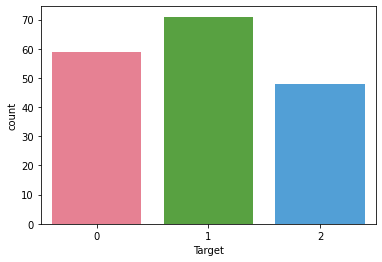

In [40]:
sns.countplot(df['Target'], palette = 'husl')

<AxesSubplot:>

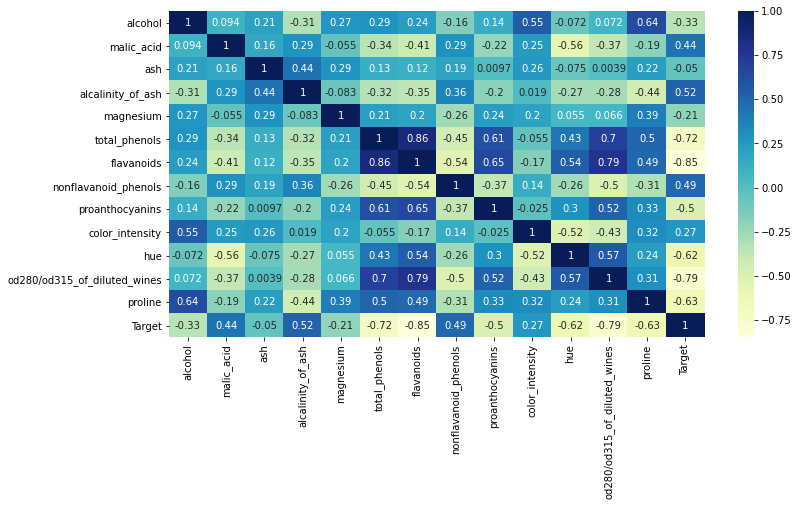

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True , cmap="YlGnBu")

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

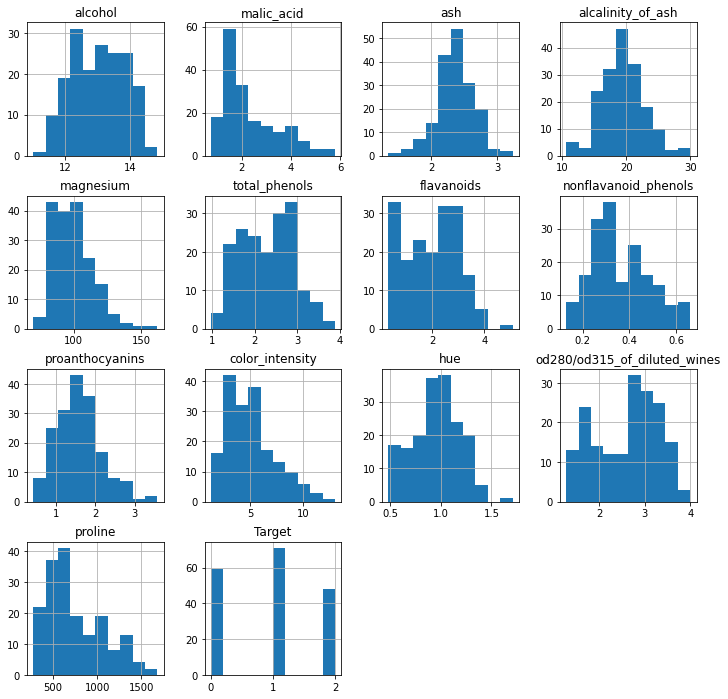

In [42]:

df.hist(figsize=(12,12))

<AxesSubplot:xlabel='Target', ylabel='flavanoids'>

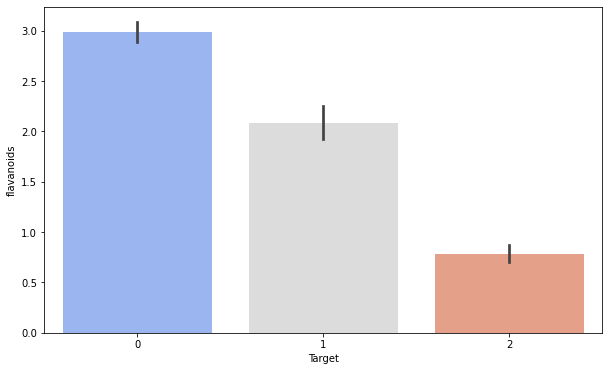

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Target', y = 'flavanoids', data = df, palette= 'coolwarm')

<AxesSubplot:xlabel='Target', ylabel='alcohol'>

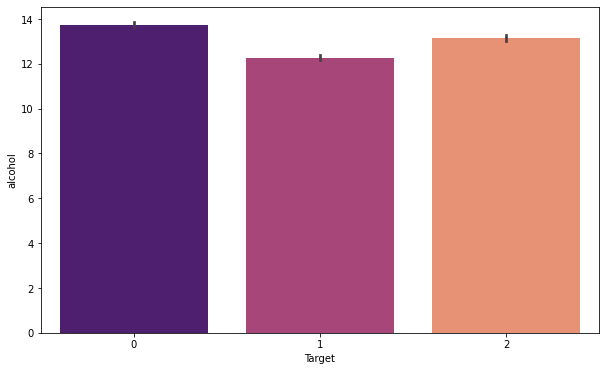

In [44]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Target', y= 'alcohol', data=df, palette= 'magma')

<AxesSubplot:xlabel='Target', ylabel='ash'>

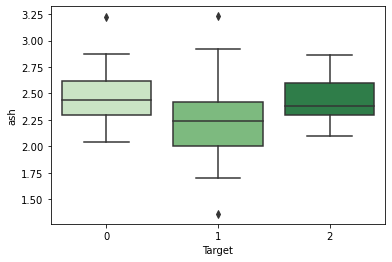

In [45]:
sns.boxplot(x='Target',y='ash', data=df, palette='Greens')

<AxesSubplot:xlabel='Target', ylabel='malic_acid'>

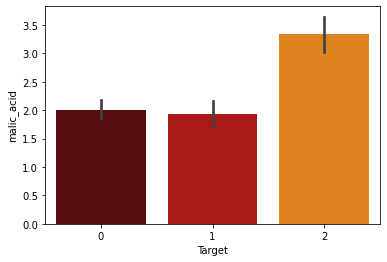

In [46]:
sns.barplot(x='Target', y='malic_acid', data=df, palette='gist_heat')

<AxesSubplot:xlabel='Target', ylabel='hue'>

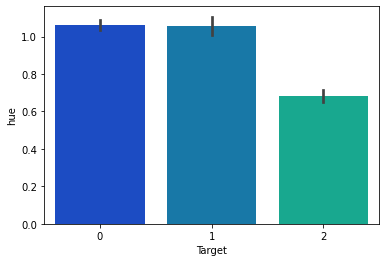

In [47]:
sns.barplot(x='Target', y='hue', palette='winter', data=df)

<AxesSubplot:xlabel='Target', ylabel='color_intensity'>

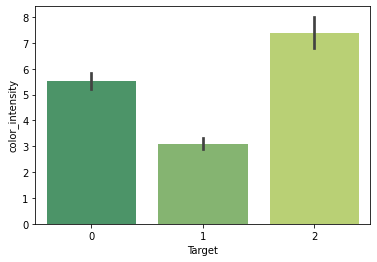

In [52]:
sns.barplot(x='Target', y='color_intensity', palette='summer', data=df)

In [48]:
from sklearn.model_selection import train_test_split                         
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [49]:
# split out validation dataset
array = df.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size=.33
seed= 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state= seed)

In [50]:
print(Y_train.shape)
print(X_train.shape)

(119,)
(119, 13)


In [51]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions= DT.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9152542372881356
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.92      0.89      0.91        27
         2.0       1.00      0.94      0.97        18

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59

[[13  1  0]
 [ 3 24  0]
 [ 0  1 17]]
